<a href="https://colab.research.google.com/github/srdg/UFI_Facerec/blob/master/UFI_Facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!git clone https://github.com/davidsandberg/facenet.git

Cloning into 'facenet'...
remote: Enumerating objects: 3146, done.
remote: Total 3146 (delta 0), reused 0 (delta 0), pack-reused 3146
Receiving objects: 100% (3146/3146), 2.93 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (2232/2232), done.


In [35]:
import os
print(os.environ['PYTHONPATH'])
os.environ['PYTHONPATH'] += ":/content/facenet/src"
print(os.environ['PYTHONPATH'])

/env/python
/env/python:/content/facenet/src


In [0]:
!wget -q https://api.github.com/repos/srdg/UFI_Facerec/zipball
!unzip -q zipball && unzip -q srdg-*/ufi-cropped.zip -d .
!rm -rf zipball srdg-*

In [0]:
!find ./ufi-cropped/train -type f -name "info.txt" -delete

In [0]:
!python3 facenet/src/align/align_dataset_mtcnn.py \
./ufi-cropped/train \
./ufi-new \
--image_size 182 \
--margin 44&>./training_align.log

In [42]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("20180402-114759.zip")

    100% |████████████████████████████████| 993kB 19.6MB/s 


In [43]:
!unzip 20180402-114759.zip
!mv 20180402-114759 models

Archive:  20180402-114759.zip
   creating: 20180402-114759/
  inflating: 20180402-114759/model-20180402-114759.meta  
  inflating: 20180402-114759/20180402-114759.pb  
  inflating: 20180402-114759/model-20180402-114759.ckpt-275.data-00000-of-00001  
  inflating: 20180402-114759/model-20180402-114759.ckpt-275.index  


In [0]:
import os
def swap_files(file1,file2):
  '''
  replaces first file from train to test so that it can be successfully aligned
  replaces second file in the reverse order
  '''
  os.rename("./ufi-cropped/train/"+file1,"./ufi-cropped/test/"+file1)
  os.rename("./ufi-cropped/test/"+file2,"./ufi-cropped/train/"+file2)

In [0]:
train_files=['s1/2.pgm',
            's160/2.pgm',
            's173/2.pgm',
            's191/2.pgm',
            's382/2.pgm',
            's403/3.pgm',
            's409/1.pgm',
            's539/2.pgm',
            's572/1.pgm',
            's575/3.pgm',
            's587/2.pgm',
            ]
test_files=['s1/3.pgm',
            's160/4.pgm',
            's173/3.pgm',
            's191/9.pgm',
            's382/5.pgm',
            's403/2.pgm',
            's409/4.pgm',
            's539/6.pgm',
            's572/2.pgm',
            's575/1.pgm',
            's587/10.pgm']

# This approach swaps the files that were not aligned while testing
# with the files that could be aligned from train folder, i.e. the 
# test image goes into training folder, and the training image comes to
# test folder. This is done before training to ensure that the test and
# train sets remain mutually exclusive of each other.
for i in range(11):
  swap_files(train_files[i],test_files[i])

In [44]:
!python3 facenet/src/classifier.py TRAIN \
ufi-new/ models/20180402-114759.pb models/my_classifier.pkl --batch_size 1000

facenet/src/classifier.py:59: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(cls.image_paths)>0, 'There must be at least one image for each class in the dataset')
2019-04-12 13:05:06.658125: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-04-12 13:05:06.658434: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x1713340 executing computations on platform Host. Devices:
2019-04-12 13:05:06.658500: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-04-12 13:05:06.753380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-12 13:05:06.753952: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x1713e40 executing computations on platform CUDA. Devices:
2019-04-12 13:05:06.754059: I tenso

In [45]:
!python3 facenet/src/align/align_dataset_mtcnn.py \
./ufi-cropped/test \
./ufi-test \
--image_size 182 \
--margin 44

Creating networks and loading parameters
2019-04-12 13:08:04.700859: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-04-12 13:08:04.701158: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x26cf4a0 executing computations on platform Host. Devices:
2019-04-12 13:08:04.701199: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-04-12 13:08:04.800997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-12 13:08:04.801636: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x26cffa0 executing computations on platform CUDA. Devices:
2019-04-12 13:08:04.801679: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-04-12 13:08:04.802232: I tensorflow/core/commo

In [46]:
!python3 facenet/src/classifier.py CLASSIFY \
ufi-test/ models/20180402-114759.pb models/my_classifier.pkl --batch_size 1000 

facenet/src/classifier.py:59: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(cls.image_paths)>0, 'There must be at least one image for each class in the dataset')
2019-04-12 13:08:56.276614: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-04-12 13:08:56.276875: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3291340 executing computations on platform Host. Devices:
2019-04-12 13:08:56.276934: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-04-12 13:08:56.371379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-12 13:08:56.371952: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3291e40 executing computations on platform CUDA. Devices:
2019-04-12 13:08:56.372018: I tenso

In [0]:
#-------------------------
# This part of the code is meant for debugging
#----------------------------------------------

In [0]:
def file_parser(filename):
  '''
  Parser for the training and testing logs
  while aligning the images. 
  Accepts the log filename with full path as 
  argument. 
  Returns a list containing the full paths to 
  the image files that were not aligned successfully.
  '''
  f = open(filename,"r")
  unaligned_img_files=[]
  for line in f:
    if line.startswith("Unable to align"):
      unaligned_img_files.append(line[line.find('"')+1:][:-2])
  f.close()
  return unaligned_img_files

In [0]:
unaligned_training_files = file_parser("training_align.log")

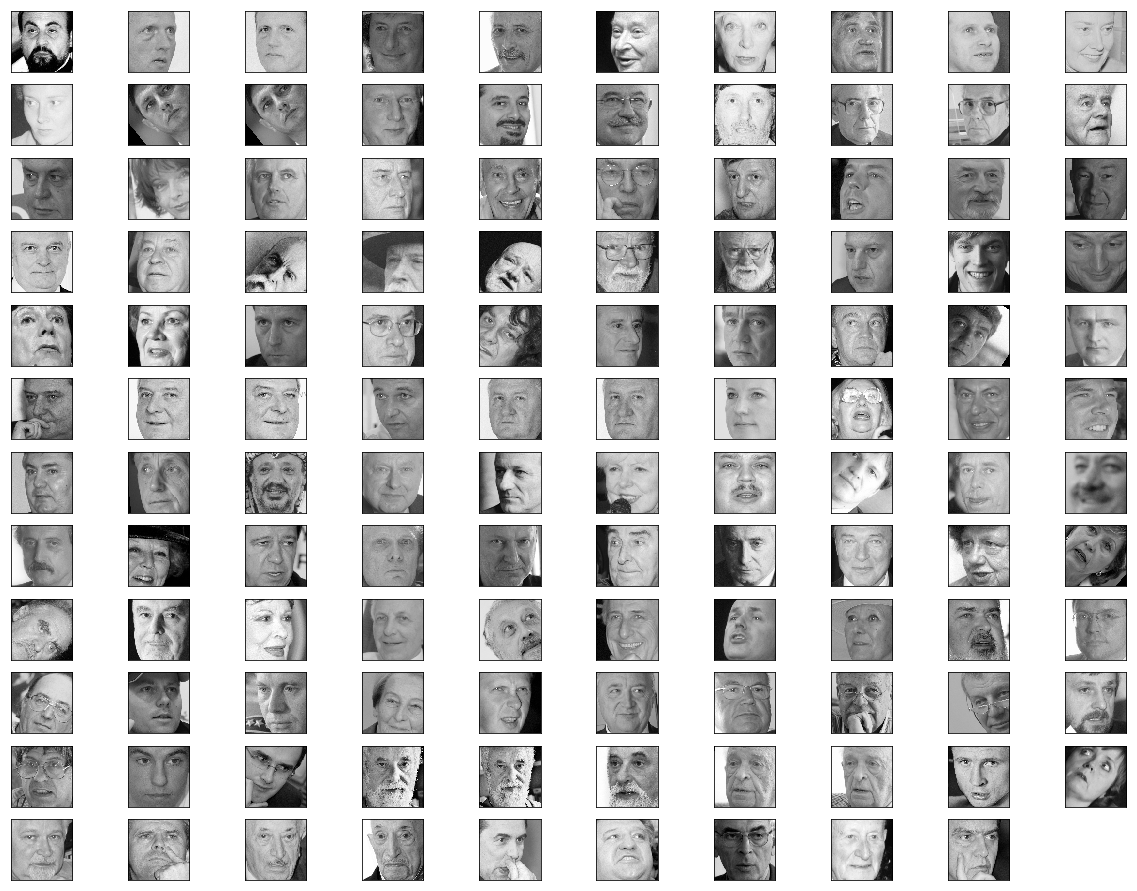

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
fig = plt.figure(figsize=(16,16))
for i in range(119):
  plt.subplot(12,10,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  if i==120:
    continue
  plt.imshow(cv2.imread(unaligned_training_files[i]),cmap='gray', vmin=0, vmax=255)
  plt.subplots_adjust(left=1,right=2)


In [0]:
unaligned_test_files = file_parser("test_align.log")

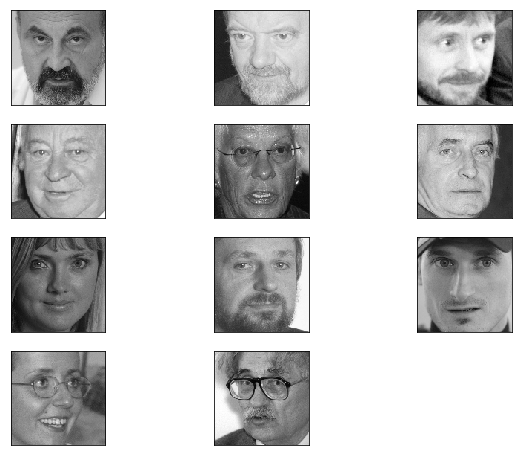

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(8,8))
for i in range(11):
  plt.subplot(4,3,i+1)
  if i==11:
    continue
  plt.imshow(cv2.imread(unaligned_test_files[i],0),cmap='gray', vmin=0, vmax=255)
  plt.subplots_adjust(left=2,right=3)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

In [0]:
import os
import pandas as pd
def process_log(path,file):
  '''
  Processes the log pointed to by file,
  path refers to the path of the dataset
  that generated the same while being processed.
  Returns a pandas dataframe with the classes,
  number of images unsuccessfully aligned per class,
  and the number of files that particular class contains.
  '''
  unaligned__classes=[]
  unaligned__files=file_parser(file)
  for img in unaligned__files:
    START=img.rfind('s')
    END=img[START:].find('/')
    unaligned__classes.append(img[START:START+END])
  set__classes=list(set(unaligned__classes))
  count__classes=[unaligned__classes.count(i) for i in set__classes]
  files_per_class_train=[len(os.listdir('./ufi-cropped/'+path+'/'+i)) for i in set__classes]

  df = pd.DataFrame(
  {'Class':set__classes,
  'Unaligned':count__classes,
  'images':files_per_class_train})
  
  return df

In [0]:
df=process_log('train','training_align.log')

In [28]:
df[df['Unaligned']==df['images']]
# no output means we do not have a class where
# all images were unsuccessfully aligned

,Class,Unaligned,images


In [0]:
df=process_log('train','test_align.log')

In [32]:
df

,Class,Unaligned,images
0,s403,1,8
1,s409,1,5
2,s191,1,8
3,s1,1,9
4,s572,1,9
5,s160,1,6
6,s173,1,8
7,s575,1,3
8,s539,1,4
9,s382,1,6
